# Lab 5: Wide and Deep Networks
## by Michael Doherty, Leilani Guzman, and Carson Pittman

In January 1922, [Leonard Thompson](https://en.wikipedia.org/wiki/Leonard_Thompson_(diabetic)) was hospitalized in Toronto, Canada. Having been diagnosed with Type 1 diabetes, a death sentence at the time, the 14 year old Thompson was staring death in the face. Fighting for his life, Thompson received the [first ever injection of insulin](https://diabetes.org/blog/history-wonderful-thing-we-call-insulin); less than 24 hours later, Thompson's blood sugar levels were back to normal.

Thanks to the discovery and production of synthetic insulin, people with diabetes can now live relatively normal lives. Nevertheless, diabetes remains a significant health hazard, especially among adults in the United States, where [about 10% of Americans have diabetes and about 33% of Americans have prediabetes](https://www.cdc.gov/diabetes/library/spotlights/diabetes-facts-stats.html#:~:text=Key%20findings%20include%3A,t%20know%20they%20have%20it.). To help combat this, the Center for Disease Control and Prevention (CDC) annually performs "Behavioral Risk Factor Surveillance System" (BRFSS) telephone surveys, in which they collect health related data about American adults.

Our dataset, titled "Diabetes Health Indicators Dataset", is a cleaned and consolidated subset of the BRFSS dataset from 2015 (i.e., our dataset has no missing data and only contains features that are potentially relevant to diabetes). Our task is to create a Wide and Deep Neural Network that can predict whether someone has does or doesn't have diabetes/prediabetes. 

Link to the dataset: https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset

## 1. Preparation
### 1.1 Data Preprocessing and Description

To begin, we first need to read in the data.

In [1]:
import pandas as pd

df = pd.read_csv("data/diabetes_binary_health_indicators_BRFSS2015.csv")

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


As we can see, there is no missing data in our dataset. Additionally, all of the variables are currently of type <code>float64</code>. Let's convert our categorical variables to integers so we can easily differentiate them from the numerical data.

In [2]:
categorical_columns = ['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'Smoker',
                       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 
                       'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
                       'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

df[categorical_columns] = df[categorical_columns].astype(int)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  int32  
 1   HighBP                253680 non-null  int32  
 2   HighChol              253680 non-null  int32  
 3   CholCheck             253680 non-null  int32  
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  int32  
 6   Stroke                253680 non-null  int32  
 7   HeartDiseaseorAttack  253680 non-null  int32  
 8   PhysActivity          253680 non-null  int32  
 9   Fruits                253680 non-null  int32  
 10  Veggies               253680 non-null  int32  
 11  HvyAlcoholConsump     253680 non-null  int32  
 12  AnyHealthcare         253680 non-null  int32  
 13  NoDocbcCost           253680 non-null  int32  
 14  GenHlth               253680 non-null  int32  
 15  

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40.0,1,0,0,0,0,...,1,0,5,18.0,15.0,1,0,9,4,3
1,0,0,0,0,25.0,1,0,0,1,0,...,0,1,3,0.0,0.0,0,0,7,6,1
2,0,1,1,1,28.0,0,0,0,0,1,...,1,1,5,30.0,30.0,1,0,9,4,8
3,0,1,0,1,27.0,0,0,0,1,1,...,1,0,2,0.0,0.0,0,0,11,3,6
4,0,1,1,1,24.0,0,0,0,1,1,...,1,0,2,3.0,0.0,0,0,11,5,4


It's important to note that we do not need to one-hot encode our categorical variables, as they are already in a suitable format for our models. Our binary categorical variables (such as <code>HighBP</code> and <code>Stroke</code>) are either 0 or 1, so one-hot encoding them would be redundant and only increase the dimensionality of our dataset (which is not ideal); the other categorical variables (<code>GenHlth</code>, <code>Age</code>, <code>Education</code>, and <code>Income</code>) are ordinal, so we don't want to one-hot encode them as we want to capture the inherit ordering of the data.

The last thing we need to do is normalize our numeric data. 

In [3]:
from sklearn import preprocessing

df[['BMI', 'MentHlth', 'PhysHlth']] = preprocessing.normalize(df[['BMI', 'MentHlth', 'PhysHlth']])

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  int32  
 1   HighBP                253680 non-null  int32  
 2   HighChol              253680 non-null  int32  
 3   CholCheck             253680 non-null  int32  
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  int32  
 6   Stroke                253680 non-null  int32  
 7   HeartDiseaseorAttack  253680 non-null  int32  
 8   PhysActivity          253680 non-null  int32  
 9   Fruits                253680 non-null  int32  
 10  Veggies               253680 non-null  int32  
 11  HvyAlcoholConsump     253680 non-null  int32  
 12  AnyHealthcare         253680 non-null  int32  
 13  NoDocbcCost           253680 non-null  int32  
 14  GenHlth               253680 non-null  int32  
 15  

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,0.862863,1,0,0,0,0,...,1,0,5,0.388288,0.323574,1,0,9,4,3
1,0,0,0,0,1.000000,1,0,0,1,0,...,0,1,3,0.000000,0.000000,0,0,7,6,1
2,0,1,1,1,0.550823,0,0,0,0,1,...,1,1,5,0.590167,0.590167,1,0,9,4,8
3,0,1,0,1,1.000000,0,0,0,1,1,...,1,0,2,0.000000,0.000000,0,0,11,3,6
4,0,1,1,1,0.992278,0,0,0,1,1,...,1,0,2,0.124035,0.000000,0,0,11,5,4


Now that we're done with pre-processing, our final dataset can be described as follows:
- <code>Diabetes_binary</code>: The target variable; 0 means no diabetes, 1 means prediabetes or diabetes.
- **Normalized Numeric Data**:
    - <code>BMI</code>: The Body Mass Index of the person.
    - <code>MentHlth</code>: Number of days during the past 30 days when the person's mental health wasn't good (i.e., lots of stress, depressive moods, etc.).
    - <code>PhysHlth</code>: Number of days during the past 30 days when the person's physical health wasn't good (i.e., was injured, sick, etc.)
- **Ordinal Data**:
    - <code>GenHlth</code>: The person's health, as rated by themselves. 1 = excellent, 2 = very good, 3 = good, 4 = fair, 5 = poor.
    - <code>Age</code>: The person's age category, defined as follows:
        - 1 = Age 18-24
        - 2 = Age 25-29
        - 3 = Age 30-34
        - 4 = Age 35-39
        - 5 = Age 40-44
        - 6 = Age 45-49
        - 7 = Age 50-54
        - 8 = Age 55-59
        - 9 = Age 60-64
        - 10 = Age 65-69
        - 11 = Age 70-74
        - 12 = Age 75-79
        - 13 = Age 80+
    - <code>Education</code>: The person's education level category, defined as follows:
        - 1 = Never attended school or only kindergarten
        - 2 = Grades 1 through 8 (Elementary)
        - 3 = Grades 9 through 11 (Some high school)
        - 4 = Grade 12 or GED (High school graduate)
        - 5 = College 1 year to 3 years (Some college or technical school)
        - 6 = College 4 years or more (College graduate)
    - <code>Income</code>: The person's annual housecome income category, defined as follows:
        - 1 = Less than \\$10,000
        - 2 = \\$10,000 - \\$14,999
        - 3 = \\$15,000 - \\$19,999
        - 4 = \\$20,000 - \\$24,999
        - 5 = \\$25,000 - \\$34,999
        - 6 = \\$35,000 - \\$49,999
        - 7 = \\$50,000 - \\$74,999
        - 8 = \\$75,000 or more
- **Binary Categorical Data**:
    - <code>HighBP</code>: 0 = Person doesn't have high blood pressure, 1 = Person has high blood pressure
    - <code>HighChol</code>: 0 = Person doesn't have high cholesterol, 1 = Person has high cholesterol
    - <code>CholCheck</code>: 0 = Person hasn't had cholesterol checked in last 5 years, 1 = Person has had cholesterol checked in last 5 years
    - <code>Smoker</code>: 0 = Person hasn't smoked at least 100 cigarettes in their life, 1 = Person has smoked at least 100 cigarettes in their life
    - <code>Stroke</code>: 0 = Person hasn't been told they've had a stroke, 1 = Person has been told they've had a stroke
    - <code>HeartDiseaseorAttack</code>: 0 = Person hasn't had coronary heart disease (CHD) or myocardial infarction (MI), 1 = Person has/has had coronary heart disease (CHD) or myocardial infarction (MI)
    - <code>PhysActivity</code>: 0 = Person hasn't participated in non-work related physical activity in the past 30 days, 1 = Person has participated in non-work related physical activity in the past 30 days
    - <code>Fruits</code>: 0 = Person doesn't eat fruit 1 or more times per day, 1 = Person eats fruit 1 or more times per day
    - <code>Veggies</code>: 0 = Person doesn't eat vegetables 1 or more times per day 1 = Person eats vegetables 1 or more times per day
    - <code>HvyAlcoholConsump</code>: 0 = Person isn't a heavy drinker (14 or fewer drinks per week for adult men, 7 or fewer drinks per week for adult women), 1 = Person is a heavy drinker (14+ drinks per week for adult men, 7+ drinks per week for adult women)
    - <code>AnyHealthcare</code>: 0 = Person doesn't have any kind of health care coverage, 1 = Person has any kind of health care coverage
    - <code>NoDocbcCost</code>: 0 = Person has not had a time in the past 12 months in which they needed to see a doctor but couldn't because of cost, 1 = Person has had a time in the past 12 months in which they needed to see a doctor but couldn't because of cost
    - <code>DiffWalk</code>: 0 = Person doesn't have serious difficulty walking or climbing stairs, 1 = Person has serious difficulty walking or climbing stairs
    - <code>Sex</code>: 0 = Person's sex is Female, 1 = Person's sex is Male

### 1.2 Cross-Product Features

Now we need to create some cross-product features for our Wide and Deep Network. [According to the CDC](https://www.cdc.gov/diabetes/basics/risk-factors.html), some factors that contribute to diabetes/prediabetes are:
- Being overweight
- Being age 45+
- Not being physically active

We also know that [many people diagnosed with diabetes have high cholesterol and high blood pressure](https://www.cdc.gov/diabetes/library/spotlights/diabetes-facts-stats.html#:~:text=Key%20findings%20include%3A,t%20know%20they%20have%20it.). Additionally, it's reasonable to assume that those living an unhealthy lifestyle (such as smoking cigarettes or regularly consuming copious amounts of alcohol) could be at a higher risk of developing diabetes/prediabetes.

Thus, we will create the following cross-product features:
- <code>Age</code>, <code>BMI</code>, and <code>PhysActivity</code>
- <code>HighBP</code> and <code>HighChol</code>
- <code>Smoker</code> and <code>HvyAlcoholConsump</code>
- <code>GenHlth</code> and <code>MentHlth</code>

**Maybe add more??** 
<!--
Possible Cross Product Features (according to ChatGPT):
- HighBP and HighChol
- Smoker and HvyAlcoholConsump
- Age and BMI
- GenHlth and MentHlth
- Education and Income
- AnyHealthcare and NoDocbcCost
- HighBP and HeartDiseaseorAttack

Others:
- Age and PhysActivity
- BMI and PhysActivity
- HvyAlcoholConsump and MentHlth
-->

In [4]:
import numpy as np

df['Age_BMI_PhysActivity_Cross'] = np.multiply(df['Age'], np.multiply(df['BMI'], df['PhysActivity']))
df['HighBP_HighChol_Cross'] = np.multiply(df['HighBP'], df['HighChol'])
df['Smoker_HvyAlcoholConsump_Cross'] = np.multiply(df['Smoker'], df['HvyAlcoholConsump'])
df['GenHlth_MentHlth_Cross'] = np.multiply(df['GenHlth'], df['MentHlth'])

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Diabetes_binary                 253680 non-null  int32  
 1   HighBP                          253680 non-null  int32  
 2   HighChol                        253680 non-null  int32  
 3   CholCheck                       253680 non-null  int32  
 4   BMI                             253680 non-null  float64
 5   Smoker                          253680 non-null  int32  
 6   Stroke                          253680 non-null  int32  
 7   HeartDiseaseorAttack            253680 non-null  int32  
 8   PhysActivity                    253680 non-null  int32  
 9   Fruits                          253680 non-null  int32  
 10  Veggies                         253680 non-null  int32  
 11  HvyAlcoholConsump               253680 non-null  int32  
 12  AnyHealthcare   

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,PhysHlth,DiffWalk,Sex,Age,Education,Income,Age_BMI_PhysActivity_Cross,HighBP_HighChol_Cross,Smoker_HvyAlcoholConsump_Cross,GenHlth_MentHlth_Cross
0,0,1,1,1,0.862863,1,0,0,0,0,...,0.323574,1,0,9,4,3,0.000000,1,0,1.941441
1,0,0,0,0,1.000000,1,0,0,1,0,...,0.000000,0,0,7,6,1,7.000000,0,0,0.000000
2,0,1,1,1,0.550823,0,0,0,0,1,...,0.590167,1,0,9,4,8,0.000000,1,0,2.950836
3,0,1,0,1,1.000000,0,0,0,1,1,...,0.000000,0,0,11,3,6,11.000000,0,0,0.000000
4,0,1,1,1,0.992278,0,0,0,1,1,...,0.000000,0,0,11,5,4,10.915057,1,0,0.248069


### 1.3 Performance Metric
Now we need to determine how to quantify success for our model; to do that, we need to know the distribution of values we have for our target variable <code>Diabetes_binary</code>, so let's plot that.

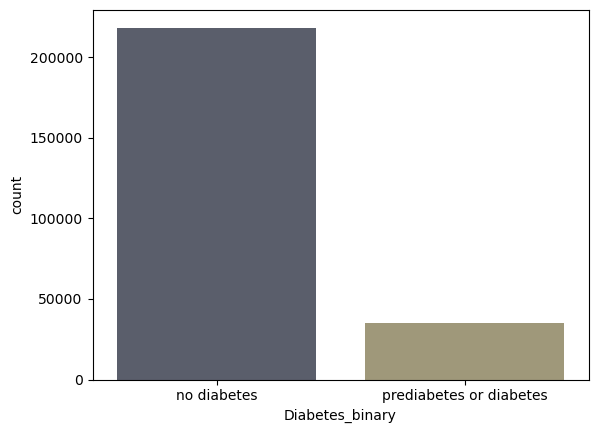

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Diabetes_binary', data=df, palette='cividis')
plt.xticks([0,1], ['no diabetes', 'prediabetes or diabetes'])
plt.show()

As we can see, there is a pretty significant class imbalance in this dataset ("no diabetes" is far more common than "prediabetes or diabetes"). Thus, we should not use accuracy (correctly predicting the <code>Diabetes_binary</code> variable) as our performance metric, as our models' accuracies will always be skewed toward the majority class ("no diabetes").

Other performance metric options include precision and recall. In our case, a high precision means that when our model predicts someone has prediabetes or diabetes, it is usually correct (i.e., optimizing for precision means we only want our model to predict someone has prediabetes or diabetes when it is extremely confident); on the other hand, high recall means our model is able to correctly identify all individuals with prediabetes or diabetes, even if it might also falsely predict that some people have prediabetes or diabetes, even when they don't.

For our prediction models, we want to optimize for **recall**, as this performance metric best aligns with our business case. Our model's ultimate goal is to predict whether it thinks an individual has prediabetes/diabetes or not; however, it's important to note that our model **cannot diagnose individuals with prediabetes or diabetes**, as that's something only medical professionals can do. Rather, our model would be used as a pre-screening tool to determine if someone should get tested for prediabetes or diabetes. Thus, we want to ensure that our model encourages everyone who does have prediabetes or diabetes to go and get medically tested, even if that means it has incorrect predictions for those who have neither (as they would only need to get a medical test to determine that they don't have prediabetes or diabetes, which is a relatively minor inconvenience). 

### 1.4 Training and Testing Method
Now we need to choose a method for splitting our data into training and testing data. We've chosen to use StratifiedKFold cross validation with 5 splits. We need to use StratifiedKFold (as opposed to just KFold) because of the class imbalance in our dataset; using StratifiedKFold ensures that each fold will contain the same proportion of each class (i.e., all folds might have a split of 77% class 0 and 23% class 1). This is important, as the model needs to be trained and tested on representative samples of the overall dataset.

We decided to use 5 splits as this allows for an 80/20 train test split (where our model trains on 80% of the data and uses the other 20% as validation data). We think this is enough, as our dataset has a lot of data.

This cross validation method is a realistic mirroring of how an algorithm would be used in practice, as our dataset is public information collected by the CDC. If the CDC were the ones creating the model, they would have access to the entirety of the dataset as soon as its been collected; they would also need to stratify the splits, as the data will always be imbalanced (as most people don't have diabetes/prediabetes). 20% of the data is sufficient for testing, due to the large amount of data available.

In [12]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import recall_score

def get_recall(X, y, new_model):
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

    recall_scores = []

    i = 1
    for train_index, test_index in cv.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        stats, loss, history = new_model(X_train, X_test, y_train, y_test)

        print('Fold', i)
        print(f"No Diabetes Recall: {stats['0']['recall']:.3f}\nPrediabetes/Diabetes Recall: {stats['1']['recall']:.3f}\nWeighted Recall: {stats['weighted avg']['recall']:.3f}")
        print(f'Loss: {loss:.3f}')
        i += 1
        
        plt.figure(figsize=(10,4))
        plt.subplot(2,2,1)
        plt.plot(history.history['recall'])
        plt.ylabel('Recall')
        plt.title('Training')
        plt.subplot(2,2,2)
        plt.plot(history.history['val_recall'])
        plt.title('Validation')

        plt.subplot(2,2,3)
        plt.plot(history.history['loss'])
        plt.ylabel('Loss')
        plt.xlabel('epochs')
        plt.subplot(2,2,4)
        plt.plot(history.history['val_loss'])
        plt.xlabel('epochs')

        plt.show()

        recall_scores.append(stats['weighted avg']['recall'])

    plt.bar(range(len(recall_scores)), recall_scores)
    plt.ylim([min(recall_scores) - 0.01, max(recall_scores)])
    print("Average Recall:", np.mean(recall_scores))

## 2. Modeling
### 2.1 Initial Models

In [7]:
# keep this here until we're ready to submit
# only run this once, if you run it multiple times the variables names
# will reset and the plotting won't work
import tensorflow as tf
recall_metric = tf.keras.metrics.Recall()

In [13]:
from tensorflow.keras.layers import Input, Dense, Embedding, concatenate
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report

def wide_and_deep_model(X_train, X_test, y_train, y_test):
    # Define categorical columns and crossed columns
    categorical_columns = ['HighBP', 'HighChol', 'CholCheck', 'Smoker',
                           'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 
                           'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
                           'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

    cross_col_df_names = ['Age_BMI_PhysActivity_Cross', 'HighBP_HighChol_Cross', 'Smoker_HvyAlcoholConsump_Cross', 'GenHlth_MentHlth_Cross']

    numeric_columns = ['BMI', 'MentHlth', 'PhysHlth']
    
    # Extract features for cross columns
    X_train_crossed = X_train[cross_col_df_names].to_numpy()
    X_test_crossed = X_test[cross_col_df_names].to_numpy()

    # Extract categorical features
    X_train_categorical = X_train[categorical_columns].to_numpy()
    X_test_categorical = X_test[categorical_columns].to_numpy()

    # Extract numerical features
    X_train_num = X_train[numeric_columns].to_numpy()
    X_test_num = X_test[numeric_columns].to_numpy()

    # Build crossed column embeddings
    crossed_outputs = []
    input_crossed = Input(shape=(X_train_crossed.shape[1],), dtype='int64', name='wide_inputs')

    for idx, col in enumerate(cross_col_df_names):
        N = int(max(X_train_crossed[:, idx].max(), X_test_crossed[:, idx].max()) + 1)
        N_reduced = int(np.sqrt(N))

        x = tf.gather(input_crossed, idx, axis=1)
        x = Embedding(input_dim=N, output_dim=N_reduced, input_length=1, name=col + 'embed')(x)
        crossed_outputs.append(x)

    wide_branch = concatenate(crossed_outputs, name='wide_concatenate_1')

    all_deep_branch_outputs = []

    # Build categorical embeddings
    input_categorical = Input(shape=(X_train_categorical.shape[1],), dtype='int64', name='categorical')
    for idx, col in enumerate(categorical_columns):
        N = int(max(X_train_categorical[:, idx].max(), X_test_categorical[:, idx].max()) + 1)
        N_reduced = int(np.sqrt(N))

        x = tf.gather(input_categorical, indices=idx, axis=1)
        x = Embedding(input_dim=N, output_dim=N_reduced, input_length=1, name=col + 'embed')(x)
        all_deep_branch_outputs.append(x)

    # Build numerical input branch
    input_numeric = Input(shape=(X_train_num.shape[1],), name='numeric')
    x_dense = Dense(units=10, activation='relu', name='numeric_1')(input_numeric)
    all_deep_branch_outputs.append(x_dense)

    # Merge deep branches
    deep_branch = concatenate(all_deep_branch_outputs, name='concatenate_embeds')
    deep_branch = Dense(units=50, activation='relu', name='deep1')(deep_branch)
    deep_branch = Dense(units=25, activation='relu', name='deep2')(deep_branch)
    deep_branch = Dense(units=10, activation='relu', name='deep3')(deep_branch)

    # Merge wide and deep branches
    final_branch = concatenate([wide_branch, deep_branch], name='concatenate_wide_deep')
    final_branch = Dense(units=1, activation='sigmoid', name='combined')(final_branch)

    # Create and compile the model    
    model = Model(inputs=[input_crossed, input_categorical, input_numeric], outputs=final_branch)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[recall_metric])

    # Train the model
    recall_metric.reset_states()
    
    # make the model care more about the recall for class 1
    class_weights = {0: 1, 1: 5}
    
    history = model.fit([X_train_crossed, X_train_categorical, X_train_num],
                        y_train,
                        epochs=5, batch_size=32, verbose=0,
                        validation_data=([X_test_crossed, X_test_categorical, X_test_num], y_test),
                        class_weight=class_weights)

    # Evaluate the model
    yhat = np.round(model.predict([X_test_crossed, X_test_categorical, X_test_num], verbose=0))

    stats = classification_report(y_test, yhat, output_dict=True)
    
    loss, _ = model.evaluate([X_test_crossed, X_test_categorical, X_test_num], y_test, verbose=0)

    # return the stats, loss, and history of the model
    return stats, loss, history

Fold 1
No Diabetes Recall: 0.725
Prediabetes/Diabetes Recall: 0.754
Weighted Recall: 0.729
Loss: 0.4945927858352661


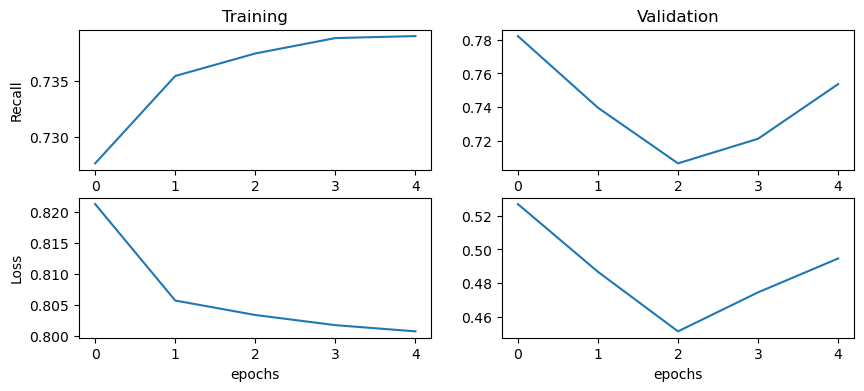

Fold 2
No Diabetes Recall: 0.751
Prediabetes/Diabetes Recall: 0.723
Weighted Recall: 0.747
Loss: 0.46058815717697144


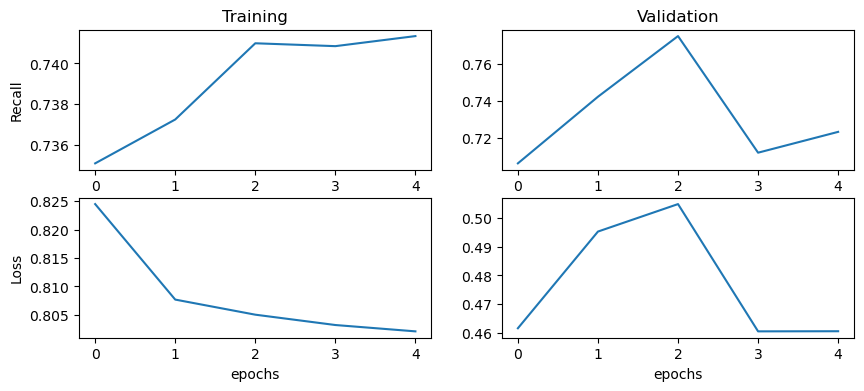

Fold 3
No Diabetes Recall: 0.745
Prediabetes/Diabetes Recall: 0.728
Weighted Recall: 0.742
Loss: 0.4882160425186157


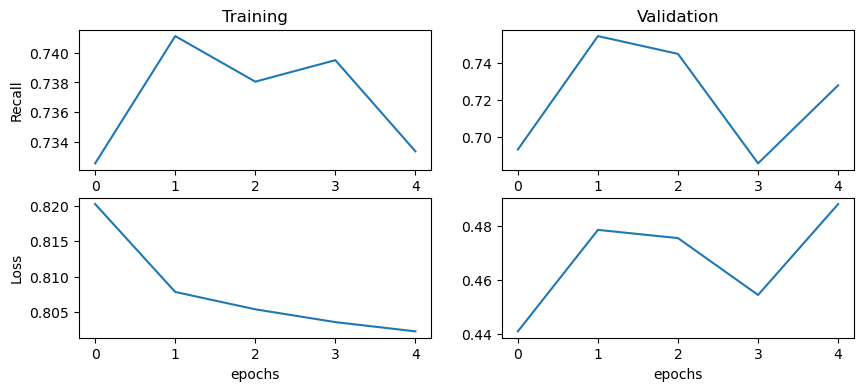

Fold 4
No Diabetes Recall: 0.691
Prediabetes/Diabetes Recall: 0.782
Weighted Recall: 0.704
Loss: 0.5215340852737427


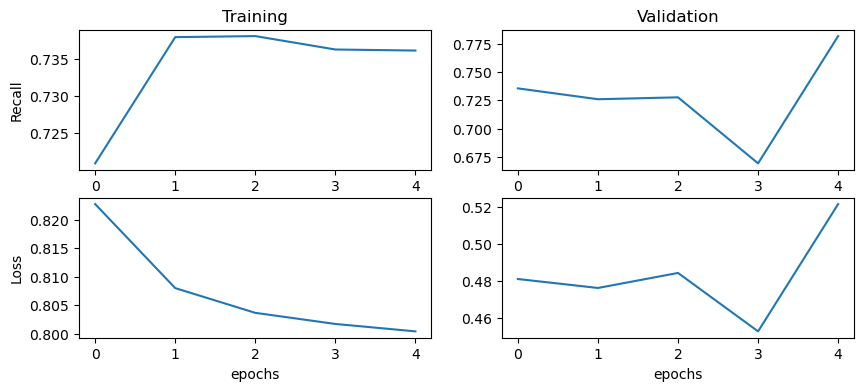

Fold 5
No Diabetes Recall: 0.763
Prediabetes/Diabetes Recall: 0.713
Weighted Recall: 0.756
Loss: 0.4607296586036682


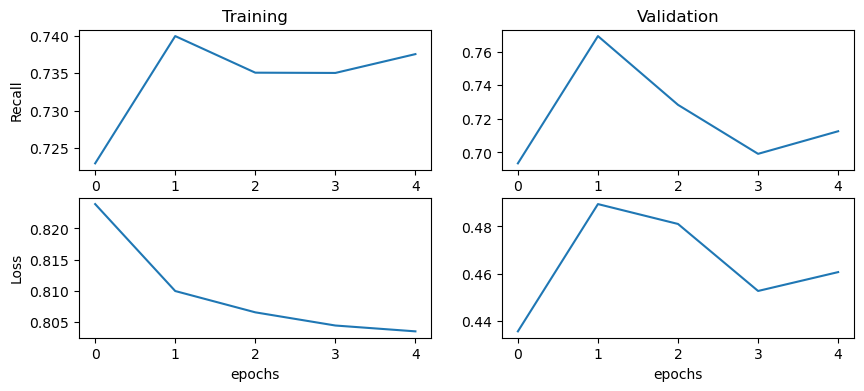

Average Recall: 0.7357221696625671


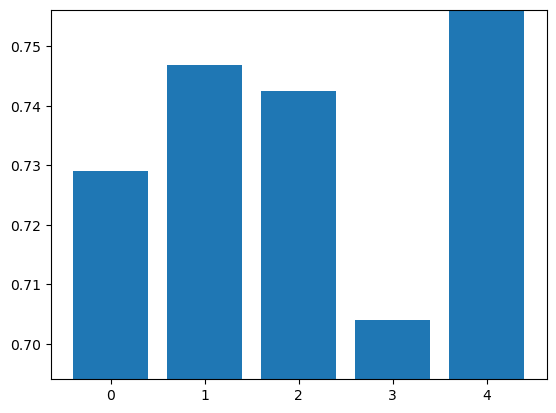

In [14]:
# Call get_recall with the wide_and_deep_model function

X = df.drop(columns=["Diabetes_binary"])
y = df["Diabetes_binary"]

get_recall(X, y, wide_and_deep_model)

### 2.2 Model Comparison

### 2.3 Wide and Deep Network vs. Standard Multi-Layer Perceptron
(We can also compare to just a "deep" network, in which case rename this section)

## 3. Embedding Weights of Our Deep Network
### 3.1 Capture Embedding Weights

### 3.2 Visualization and Explanation